# Didaktisches Konzept

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Übersicht

Einen Teil des didaktischen Konzeptes stelle ich Studierenden zur Verfügung. Sie wollen ja wissen, welche Prüfungsleistungen es gibt und wann welche Arten von Terminen stattfinden, etc. Dieser Teil findet sich in [Kapitel 1](kurskonzept). 

Dieser Abschnitt beinhaltet weitergehende Informationen, die insbesondere für Lehrende interessant sind. Warum habe ich welche Formate ausgewählt? Welche didaktischen Hintergründe lege ich zugrunde? An welchen didaktischen Autoren orientiere ich mich?

## Interaktive Lehrmaterialien mit jupyter

Der Großteil der Kursmaterialien ist als jupyter notebook implementiert, da diese interaktiv nutzbar sind: Code lässt sich direkt ausführen und als Diagramm anzeigen {cite:p}`lorena_a_barba_teaching_2019` und ein reproduzierbarer und nachvollziehbarer Umgang mit Energiedaten kann geübt werden.

<AxesSubplot:xlabel='Zeit [min.]'>

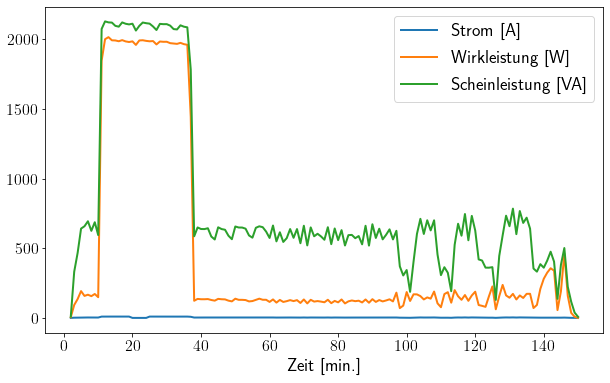

In [3]:
datei_da = os.path.exists('../data/wama.csv')
datei_da = False
if datei_da:
  beispieldaten = pd.read_csv('../data/wama.csv', header= 2, names=['Zeit [min.]', 'Strom [A]',  'Wirkleistung [W]', 'Scheinleistung [VA]'])
else:
  beispieldaten = pd.read_csv('https://gitlab.com/jfmay/systemtechnik-fuer-energieeffizienz/-/raw/master/data/wama.csv', header= 2, names=['Zeit [min.]', 'Strom [A]',  'Wirkleistung [W]', 'Scheinleistung [VA]'])

beispieldaten.plot(x='Zeit [min.]')

Im obigen Diagramm lässt sich diskutieren, welche Einzelprozesse beim Waschvorgang stattfinden (heizen, schleudern). Daran kann man dann mögliche Energiesparpotenziale diskutieren.

In [4]:
fig = go.Figure()
fig.add_trace(go.Box(y=beispieldaten['Strom [A]'], name = 'Strom [A]',
                marker_color = 'indianred'))

fig.show()

Mit `plotly` und anderen interaktiven Diagrammformaten lässt sich zudem komfortabel ablesen - die Anzeige fehlt allerdings im pdf: Beispielsweise zeigt das obige Diagramm, welchen Mittelwert der minütlich gemessene Strom für die Waschmaschine hat. 

Das bedeutet, dass Studierende _am Beispiel arbeiten_ und dadurch echte Erfahrungen sammeln. {cite:p}`sweller_worked_2006` zeigt, dass Studierende mehr lernen, wenn man sie bei der Problemlösung führt, als wenn sie Probleme ohne Führung lösen sollen. Am meisten profitieren davon diejenigen, die noch nicht so viel verstanden haben (Novizen) {cite:p}`chen_worked_2015`. Dies ist vor allem für den Teil der praktischen Energiedatenanalyse mit python von Bedeutung. 

Python ist zudem als eine der beliebtesten Programmiersprachen "gut für den Lebenslauf". Es lässt sich weit über Energiedatenanalyse und Energiesimulation hinaus auch für andere Programme und Anwendungen einsetzen.

Es lässt sich einfach installieren und kostenfrei nutzen. Stellt der Dozent einen hochschulischen Server zur Verfügung, ist die Bedienung sogar einfach über den Browser möglich: mit [jupyterhub](https://jupyter.org/hub) lässt sich eine Umgebung in python festlegen, auf der alle Studierenden mit den gleichen Modulversionen arbeiten. Zudem können automatisierte Auswertungen mit [nbgrader](https://nbgrader.readthedocs.io/en/stable/index.html) durchgeführt werden. Bei entsprechender Rechtevergabe können auch Teams zusammenarbeiten in jupyterhub. Auch eine [Integration mit einem gitlab Repository für die Notebooks](https://www.youtube.com/watch?v=ruhCdixHMQI) ist denkbar.

Die Lehrmaterialien sind zusammengefasst in einem [jupyterbook](https://jupyterbook.org/intro.html). Dieses Format erlaubt es, einzelne Notebook (`.ipynb`) und Markdown (`.md`) Dateien zu einem `html` oder `pdf` Buch zusammenzuführen, das über übersichtliche Navigationsmöglichkeiten verfügt. Weitere Inspirationen finden sich in gut gemachten jupyterbooks:
- {cite:p}`dobson_epidemic_2020` über epidemische Modellierung
- {cite:p}`ryan_abernathey_introduction_2021` über Umweltdatenanalyse
- {cite:p}`wyatt_walsh_data_2021` über Data Science

## Interaktion fördern und Feedback als Dozent erhalten

Studierende sind aus anderen Kursen zumeist pdfs und Videos gewöhnt. In Präsenzkursen freuen sie sich darauf, ihre Kurskollegen im Kurs zu sehen und bei Darbietung als Videokonferenz sind Studierende häufig der Meinung, dass zuhören reicht und sie nebenher (im besten Fall) essen, bügeln, joggen, etc. können oder gar (im schlechtesten Fall) parallel andere Aktivitäten mit kognitiver Last verfolgen können (Emails schreiben, netflix schauen, etc.). 

Daher ist es wichtig, sich als Dozent Zeit zu nehmen, um die Studierenden mit der Arbeitsweise in diesem Kurs vertraut zu machen. Es ist notwendig, dass Studierende sich frühzeitig python installieren und damit erste Schritte gehen, um im weiteren Semesterverlauf mitzukommen. Dozenten sollten mit den Studierenden darüber sprechen, wie sie dies am besten organisieren können. Um dies weiter zu motivieren, sind die Meilensteine so definiert, dass bereits beim ersten Meilenstein etwas python-Code notwendig ist. 

Studierende können die Notebooks alleine ausführen und sich in selbst eingefügten Zellen Notizen machen oder weiteres ausprobieren. Dies ist auch unabhängig von den Kurszeiten möglich und so können Studierende selbständig, im eigenen Tempo, an den Materialien arbeiten.

Hier besteht jedoch die Gefahr, dass nur noch auf `Shift + Enter` gedrückt wird und somit die Notebooks durchgeklickt werden, ohne überhaupt zu verstehen, was passiert.

Daher beinhalten die Notebooks immer wieder Frage- und Antwortzellen mit Reflexionsfragen.

Bestimmte Reflexionsfragen sollen die Studierenden in Gruppenarbeit beantworten. Die dadurch sich ergebenden Fragen (Fehlermeldungen genauso wie inhaltliche Diskussionspunkte) können im Kurs thematisiert werden.

Dazu kann man als Dozent im Kurs herumgehen (in Präsenz) oder zwischen einzelnen Videokonferenzräumen wandern und aufkommende Fragen klären.

Außerdem sind einige Reflexionsfragen so formuliert, dass sie sich auch für Umfragewerkzeuge wie mentimeter eignen. So bekommt man einen Überblick über den Verständnisstand.

Wenn möglich, empfiehlt sich die Nutzung einer hochschulischen jupyter Instanz (jupyter hub). Bei entsprechenden Rechteeinstellungen können Dozenten auch während dem Kurs in die studentischen Materialien Einblick nehmen. Zudem haben alle Teilnehmenden dieselben Versionen von allen python-Modulen. Es ergeben sich keine Unstimmigkeiten bei der Bewertung. Solche jupyter hubs ermöglichen geschützte Lernräume, in denen dann auch bewertet werden kann. Auch Umfragen können so direkt im Notebook umgesetzt werden (_Calysto activity magic_) {cite:p}`lorena_a_barba_teaching_2019`. Außerdem können Studierende dann auch auf dem Laptop ihres Arbeitgebers an den Projekten arbeiten, der ggf. eine anaconda-Installation nicht so einfach erlaubt.

Je nach Kursgröße ist es auch zu empfehlen, Tutoren für python einzusetzen. Denn einige Studierende haben keinerlei Programmiererfahrung und benötigen Starthilfe. Andere hingegen haben pfiffige weiterführende Ideen und suchen dafür Unterstützung. Tutorien werden erfahrungsgemäß besonders zu Semesterbeginn und kurz vor Abgabeterminen stärker frequentiert. Dazwischen können Tutoren auch bei der Weiterentwicklung der Kursmaterialien helfen und das Feedback aus den Tutorien so auch gleich in Verbesserungen einfließen lassen. Es empfiehlt sich allerdings, bereits vergangene Kapitel erst für den jeweils zukünftigen Durchlauf zu verbessern.

Noch offen ist, wie eine hybrid-Veranstaltung gelingen kann: Denn in Präsenz sind Studierende in der Lage, in einem Raum gleichzeitig in kleineren Gruppen zusammenzuarbeiten und dafür entsprechend etwas leiser zu sprechen. In Breakout-Sessions klappt das auch gut. Aber was, wenn nun die Hälfte eines Projektteams vor Ort ist und die andere online zugeschaltet? Dann werden die verschiedenen Präsenzgruppen sehr viel lauter sprechen müssen, um gut verstanden zu werden (oder alle kostspielige noise cancelling headsets benötigen) und das Konzept funktioniert nicht mehr mit nur einem Veranstaltungsraum.

## Videos und Audios zur Unterstützung

Um zu lernen, wie ein bestimmter Code funktioniert, oder auch, um zu lernen, wie ein bestimmtes Messgerät zu bedienen ist, wäre es am besten, wenn ich als Dozentin jedem Lernenden persönlich und individuell in seiner Lerngeschwindigkeit vormachen könnte (*cognitive apprenticeship* {cite:p}`allan_collins_cognitive_1987`), wie das geht. So lernen Studierende, die richtigen Parameter zu setzen (und herauszufinden, welche falsche Ergebnisse verursachen) und wie ein Ingenieur das Schritt für Schritt herausfinden kann. Da das sehr aufwendig wäre, allen einzeln diese Dinge zu erklären und da sich das, was man da so sagt, auch wiederholt, sind hier in den Materialien sozusagen als zweitbeste Variante Lehrvideos und Audios vorgesehen. 

Studierende nutzen nicht immer Endgeräte, auf denen jupyter notebooks verfügbar sind: Smartphones, Tablets, sowie auch der Laptop des Arbeitgebers sind oft nicht in der Lage, anaconda zu nutzen. Daher sollen alle Notebooks auch als pdfs zur Verfügung sgestellt werden. So ist das Lesen des Vorlagentextes (ohne Aufgaben-Lösungen, ohne interaktive Diagramme, ohne Audios) barrierefreier möglich. Außerdem gibt es insbesondere für den Einstieg Videos zur Einführung in die Arbeit mit jupyter und python. Für weitere Erklärungen in den Notebooks werden audios eingesetzt, die sich bei Bedarf abspielen lassen und deren Inhalt Dozenten leicht anpassen können.

Zur ergänzenden Aufnahme von audios empfiehlt sich [audacity](https://www.audacityteam.org/) (open source) und ein geeignetes externes Mikrofon mit PC-Anschluss. 

## Studentische Präsentationen koordinieren und moderieren

Um die Reihenfolge bei den Meilensteinen zufällig zu gestalten, enthalten die zugehörigen Kapitel python Code, der die Team-Reihenfolge durcheinander würfelt. So sind alle zu Anfang da (weil sie ja gleich dran kommen könnten). Außerdem ist die zufällige Reihenfolge auch dafür gut, dass nicht immer die selben am Anfang das selbe erzählen, sondern, dass dies immer wieder anders läuft.

Für die Projektpräsentation am Ende empfiehlt sich ein web-basierter Timer, dessen Uhrzeit in einem offenen Tab eingesehen werden kann (z. B. [https://webuhr.de/timer-auf-15-minuten/](https://webuhr.de/timer-auf-15-minuten/) ). So kann die Präsentation im jupyterhub stattfinden und trotzdem ist den Studierenden bekannt, wie viel Zeit noch bleibt. 

## Mündliche Prüfung vorbereiten

Um mit den Studierenden die mündliche Prüfung zu üben, nimmt man Diagramme, Abbildungen oder Fotos aus einem vergangenen Kapitel und diskutiert mit der Gruppe gemeinsam, was diese Abbildung mit Energieeffizienz zu tun hat, wie die dargestellten Informationen zu bewerten sind und welche weiteren wichtigen Infos es in diesem Zusammenhang im Kurs gab.

Man kann so eine Abbildung auch in mentimeter hinterlegen und die Studierenden über Chatnachrichten antworten lassen. So trauen sich ggf. auch die schüchternen Studierenden, etwas zu schreiben und die Hemmschwelle sinkt, etwas ggf. Falsches zu sagen.

## Kurze Vorbereitungscheckliste für Dozenten für die Live-Termine

- [ ] Notebooks durchlaufen lassen: funktioniert der Code? (ggf. debuggen)
- [ ] Notebooks durchlesen und ggf. Fehler korrigieren
- [ ] inhaltliche Aktualisierungen vornehmen
- [ ] Reflexionsfragen ggf. anpassen
- [ ] Links überprüfen
- [ ] mentimeter-Fragen vorbereiten
- [ ] jupyterhub synchronisieren mit gitlab
- [ ] überprüfen, ob html-Buch auf gitlab korrekt

## Ordnerstruktur und Inhalte

Die Lehrmaterialien hier im Verzeichnis sind folgendermaßen gegliedert:

In [9]:
ls ../

01/  06/  11/  16/      cases/           include/   requirements.txt  _toc.yml
02/  07/  12/  17/      _config.yml      log/       specs/            video/
03/  08/  13/  18/      data/            nb/        sye2.bib*
04/  09/  14/  audio/   environment.yml  proj/      sye.bib*
05/  10/  15/  _build/  img/             README.md  teach/


- Die zu den jeweiligen Kapiteln gehörenden Notebooks finden sich in den mit Nummern bezeichneten Ordnern, z. B. `01` für Kapitel 1.

- Der Ordner `data` enthält Datensätze. Teilweise sind diese nicht auf [gitlab](https://gitlab.com/jfmay/systemtechnik-fuer-energieeffizienz) synchronisiert, da Studierende diese entweder selbst erzeugen sollen oder sie aus rechtlichen Gründen selbst von der angegebenen Internetquelle herunterladen sollen.

- Die Datei `_config.yml` enthält Konfigurationsdateien, um das jupyter book zu erzeugen. Die zu integrierenden Dateien finden sich in der Inhaltsübersicht in `_toc.yml`. 
 - Die `html`-Version  erhält man mit dem Befehl `jb build systemtechnik-fuer-energieeffizienz/`. Die erste Seite vom jupyter book findet sich dann unter `~/_build/html/index.html/`. 
 - Die `pdf`-Version für das gesamte jupyter book erhält man mit dem Befehl `jb build systemtechnik-fuer-energieeffizienz/ --builder pdflatex`. Natürlich ist die `.pdf`-Variante weder ausführbar, noch lassen sich interaktive Grafiken betrachten.
 - Außerdem lassen sich auf jeder Seite im jupyter book oben die einzelnen Seiten als `.ipynb` oder `.pdf` herunterladen. 

- Der Ordner `img` enthält Bilddateien, die zusammen mit den Notebooks, sofern nicht anders angegeben, unter <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a> lizensiert sind.

- Die Datei `sye.bib` enthält die Literaturangaben im `.bibtex`-Format. In den Notebooks befindet sich jedes Mal unten eine Literaturangabe, so dass diese Literaturhinweise im jupyterbook ansehbar sind.

- Der Ordner `log` enthält eine aktuelle Version des Formulars zur Energieloggerausleihe. Es empfiehlt sich, dies in Absprache mit der lokalen Arbeitssicherheitsstelle und weiteren zuständigen Stellen, an die lokalen Gegebenheiten anzupassen.

- Der Ordner `nb` enthält die meisten jupyter notebooks, die im Anhang dargestellt werden.

- Der Ordner `specs` beinhaltet eine Tabelle für die Anforderungsdokumentation im `.xlsx` und im `.ods` Format. 

- Im Ordner `teach` befindet sich eine Dozentencheckliste für die Prüfung nach dem Bildkartensystem mit Zufallsgenerator für die Auswahl der Zufallsfrage. Zudem enthält der Ordner auch eine Materialliste für Dozenten sowie eine Beispiel-Bewertungs-Datei für die Projekte.
- Außerdem liegen im Ordner `oral` die Bilder, die für die aktuelle Prüfung verwendet werden (nicht auf [gitlab](https://gitlab.com/jfmay/systemtechnik-fuer-energieeffizienz) synchronisiert). 

- Der Ordner `videos` enthält die Videodateien, die im Projekt OER4EE für das Modul erstellt werden, sofern die Videos nicht educast.nrw verfügbar sind.

## Feedback

Ist sehr erwünscht. Bitte gerne bei der [Autorin](https://www.th-koeln.de/personen/johanna.may/) melden.

```{bibliography}
:filter: docname in docnames
```